# 1. Introduction

## 1.1 Problem Statement
> In healthcare industry, it is always challenging to predict insurance cost accurately because of uncertainty and complexity of insurance plans.

## 1.2 Objective & Methodology 

**Objective**

> The objective of this project is to predict the insurance charges based on the given demographic and health information of individuals. 

**Methodology**

> This project aims to investigate the relationship between various patient characteristics and medical costs using multiple linear regression with forward/backward feature selection, as well as incorporating regularization methods such as Ridge regression, LASSO regression, and Elastic Net (with a ratio of 0.5). Additionally, a neural network approach was employed to explore the predict the outcome variable. Model performance was evaluated using R-squared, Root-mean-squared error (RMSE), and mean absolute error (MAE).

## 1.3 Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## 1.4 Load data

In [2]:
datafile = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(datafile)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1.5 Data Summary

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
print(data.shape)

(1338, 7)


In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Pre-processing (Categorical variables into numerical values)

In [7]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [8]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# 2. Exploratory Data Analysis (EDA)

## 2.1 BMI vs Charges (Target)

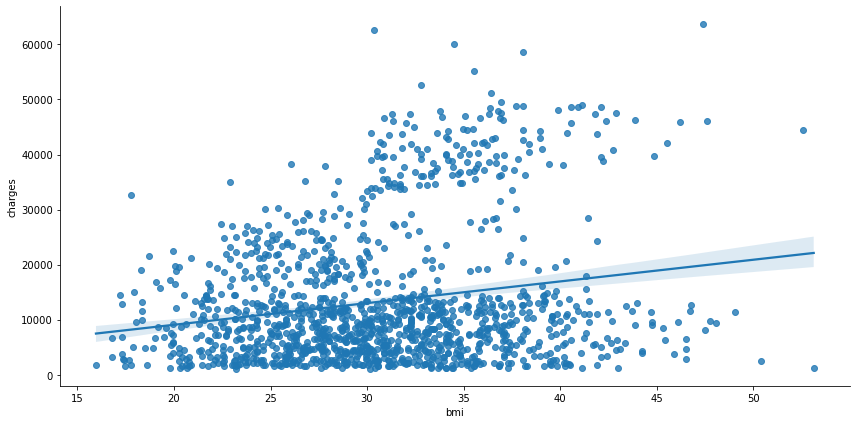

In [9]:
sns.lmplot(data=data, x = "bmi", y="charges", aspect =2, height = 6)

## 2.2 Boxplot of variables

<AxesSubplot:>

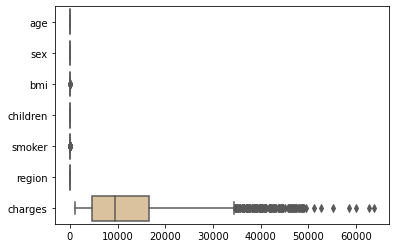

In [10]:
sns.boxplot(data=data, orient='h', palette='Set2')

## 2.3 Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

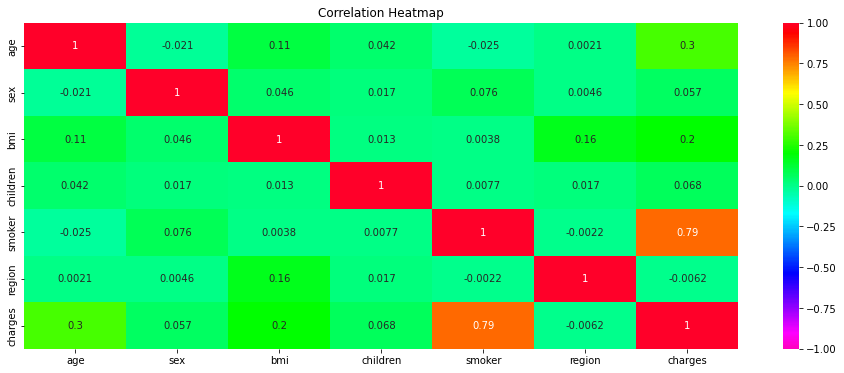

In [11]:
plt.figure(figsize=(16,6))

heatmap = sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True, cmap='gist_rainbow_r')

heatmap.set_title('Correlation Heatmap')

> Strong positive correlation is observed with 'Smoker' and 'Charges(Target)'.

## 2.4 Insurance Charges (Target)

C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


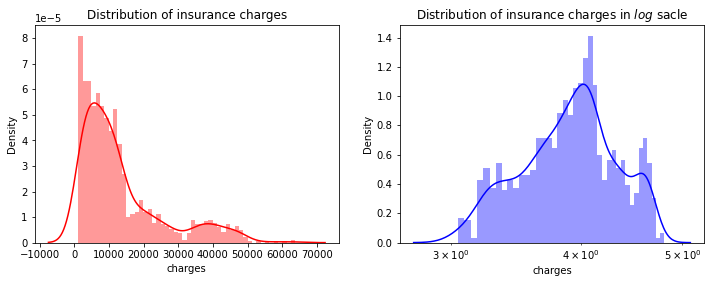

In [12]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(data['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(data['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

## 2.5 Smoker

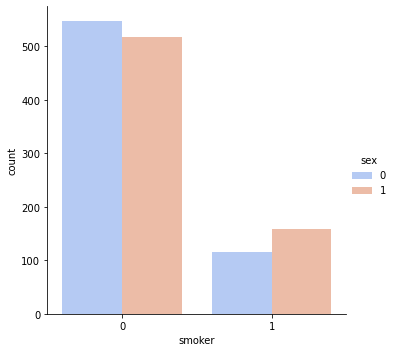

In [13]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="coolwarm", data=data)

> More male smokers (sex = 0) than women smokers.

## 2.6 Charges depending on smoker and sex

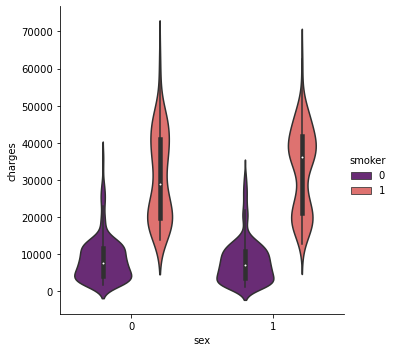

In [14]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

> There is no significant difference between male and female smokers

## 2.7 Charges of female and male

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

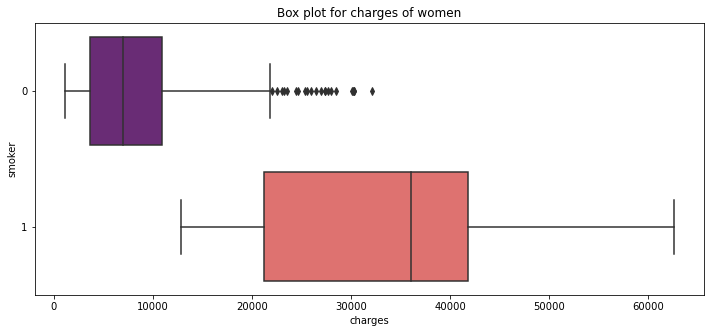

In [15]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

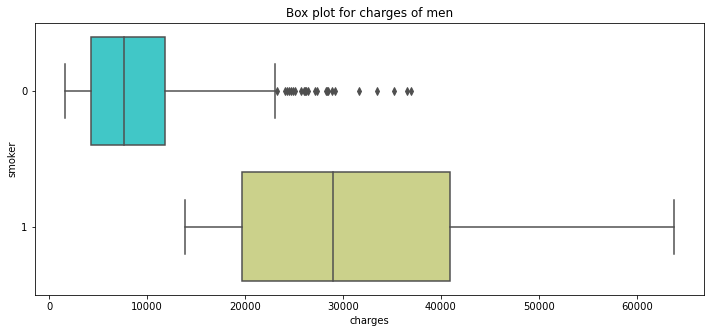

In [16]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

## 2.8 Distribution of age

C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


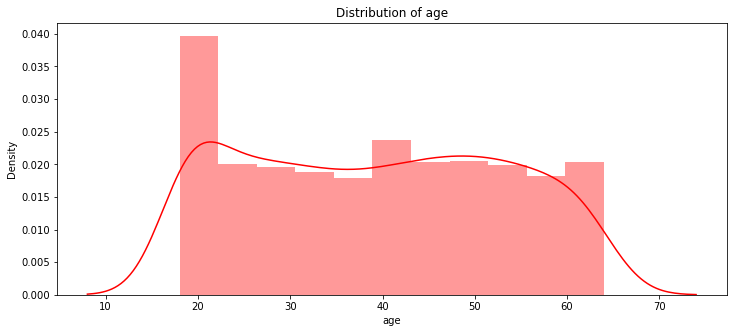

In [17]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'r')

## 2.9 Charges by age and smoker

Text(0.5, 1.0, 'Smokers and non-smokers')

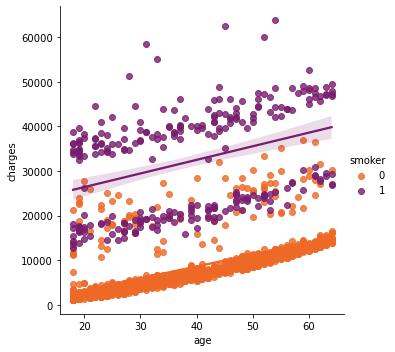

In [18]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

## 2.10 Distribution of BMI

C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


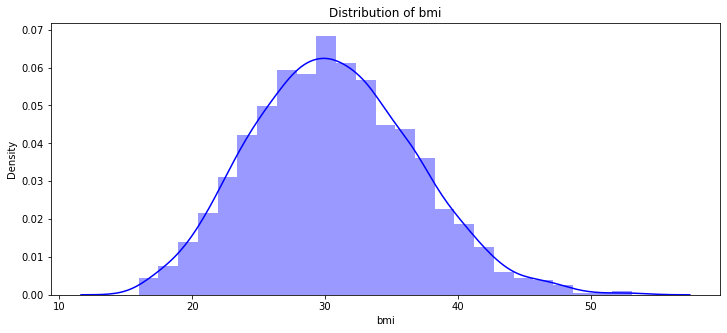

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'b')

> Normally distributed

## 2.11 Distribution of Charges

C:\Users\jisoo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


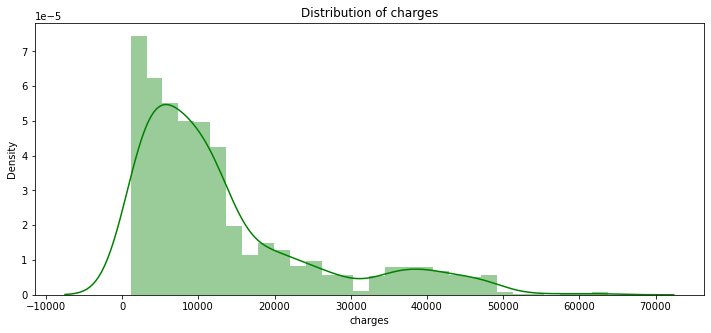

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges")
ax = sns.distplot(data["charges"], color = 'g')

## 2.12 Charges by BMI

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

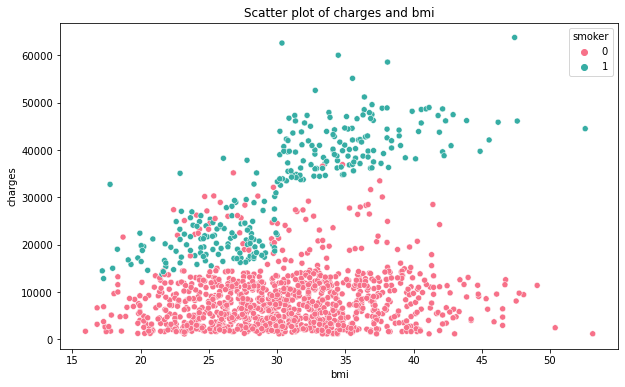

In [21]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='husl',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

# 3. Modeling

## 3.1 Random Forest Regressor

In [22]:
datafile = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(datafile)

# Define dependent and independent variables
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# One-hot encoding for the categorical variables
X = pd.get_dummies(X, columns=['sex'], drop_first=True)
X = pd.get_dummies(X, columns=['smoker'], drop_first=True)
X = pd.get_dummies(X, columns=['region'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
rf = RandomForestRegressor()

In [24]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
importances = model.feature_importances_

In [26]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

In [27]:
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)

            Feature  Importance
4        smoker_yes    0.606416
1               bmi    0.217385
0               age    0.133945
2          children    0.020104
3          sex_male    0.006585
6  region_southeast    0.005552
5  region_northwest    0.005515
7  region_southwest    0.004498


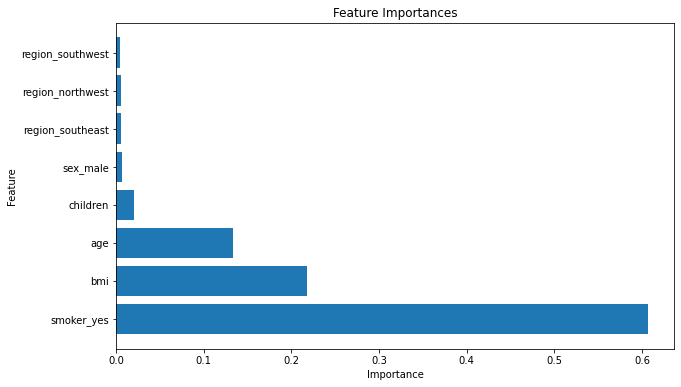

In [28]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [29]:
pred = model.predict(X_test)

In [30]:
mae_rf = mean_absolute_error(y_test, pred)
print("Mean Absolute Error:", mae_rf)

Mean Absolute Error: 2504.9796818737696


In [31]:
result = pd.DataFrame({'actual': y_test, 'pred': pred})
result

,actual,pred
764,9095.06825,10046.466768
887,5272.17580,5219.149891
890,29330.98315,28328.207492
1293,9301.89355,11462.769443
259,33750.29180,34817.086858
...,...,...
109,47055.53210,46677.501581
575,12222.89830,12253.248026
535,6067.12675,6103.235780
543,63770.42801,46682.369683


In [32]:

print(f"R2 score: {r2_score(y_test, pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, pred, squared = False)}")

rf_mse = mean_squared_error(y_test, pred, squared = False)

R2 score: 0.8672658363362553
Mean squared error: 4539.472495171418


In [33]:
rf_r2 = r2_score(y_test, pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, pred))

## 3.2.1 Regression (Forward)

In [34]:
lr = LinearRegression()

In [35]:
X_train.shape

(1070, 8)

In [36]:
Forward_Feature_Selector = SequentialFeatureSelector(lr,
           k_features= 3,
           forward=True,
           floating=False,
           scoring='r2',
           cv=5)

In [37]:
sfs = Forward_Feature_Selector.fit(X_train, y_train)

In [38]:
print('Selected features:', sfs.k_feature_idx_)

Selected features: (0, 1, 4)


In [39]:
sfs.k_feature_names_

('age', 'bmi', 'smoker_yes')

In [40]:
print('Selected score:', sfs.k_score_)

Selected score: 0.7331372786803421


In [41]:
X_train_selected = sfs.transform(X_train)

In [42]:
reg = LinearRegression()
reg.fit(X_train_selected, y_train)

LinearRegression()

In [43]:
reg.coef_

array([  259.41020462,   326.45023215, 23675.37184666])

In [44]:
reg.intercept_

-11707.802334583137

In [45]:
coef_abs = np.abs(reg.coef_)

In [46]:
print(coef_abs)

[  259.41020462   326.45023215 23675.37184666]


In [47]:
X_train.columns[[0,1,4]].tolist()

['age', 'bmi', 'smoker_yes']

In [48]:
column_names = X_train.columns[[0, 1, 4]].tolist()
column_names_array = np.array(column_names)
var_imp = pd.DataFrame({'Feature': column_names_array, 'Importance': coef_abs})
print(var_imp)

      Feature    Importance
0         age    259.410205
1         bmi    326.450232
2  smoker_yes  23675.371847


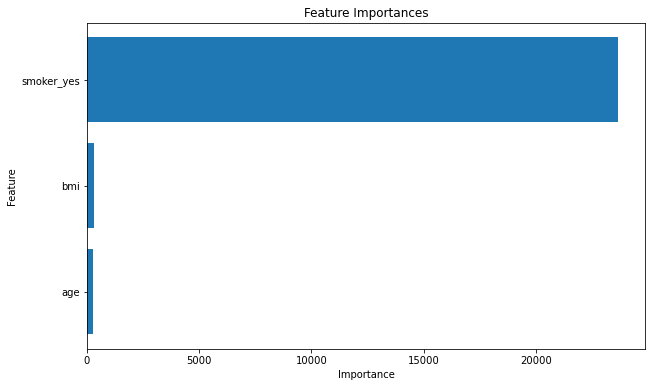

In [49]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(var_imp['Feature'], var_imp['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [50]:
X_test_selected = sfs.transform(X_test)
y_pred = reg.predict(X_test_selected)

In [51]:
mae_lr = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae_lr)

Mean Absolute Error: 4260.56009109939


In [52]:
result = pd.DataFrame({'actual': y_test, 'y_pred': y_pred})
result

,actual,y_pred
764,9095.06825,8184.041468
887,5272.17580,7431.001001
890,29330.98315,37346.437099
1293,9301.89355,8629.528305
259,33750.29180,27316.654810
...,...,...
109,47055.53210,39765.551050
575,12222.89830,12207.642341
535,6067.12675,7298.553197
543,63770.42801,41452.726068


In [53]:

print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred, squared = False)}")

R2 score: 0.7776932310583375
Mean squared error: 5874.763304187488


In [54]:
lr_r2 = r2_score(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 3.2.1 Regression (Backward)

In [55]:
Backward_Feature_Selector = SequentialFeatureSelector(lr,
           k_features= 3,
           forward=False,
           floating=False,
           scoring='r2',
           cv=5)

In [56]:
bfs = Forward_Feature_Selector.fit(X_train, y_train)

In [57]:
print('Selected features:', bfs.k_feature_idx_)

Selected features: (0, 1, 4)


In [58]:
bfs.k_feature_names_

('age', 'bmi', 'smoker_yes')

In [59]:
print('Selected score:', bfs.k_score_)

Selected score: 0.7331372786803421


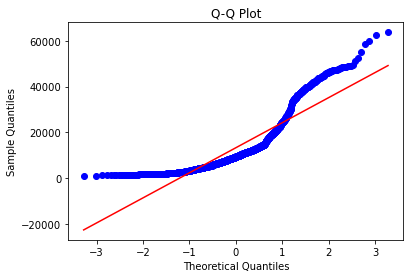

In [60]:

res = stats.probplot(data["charges"], plot = plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q Plot")
plt.show()

In [61]:
data["charges"]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [62]:
import statsmodels.api as sm

X = data[["age", "bmi", "smoker"]]
y = np.log(data["charges"])
model = sm.OLS(y, sm.add_constant(X)).fit()
residuals = model.resid
sm.ProbPlot(residuals).qqplot(line = "s")

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [63]:
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


## 3.3 Regularization

In [64]:

# Load the dataset
datafile = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(datafile)

# Define dependent and independent variables
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# One-hot encoding for the categorical variables
X = pd.get_dummies(X, columns=['sex'], drop_first=True)
X = pd.get_dummies(X, columns=['smoker'], drop_first=True)
X = pd.get_dummies(X, columns=['region'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=0.5, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mae = mean_absolute_error(y_test, ridge_pred)

# Lasso Regression
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mae = mean_absolute_error(y_test, lasso_pred)

# Elastic Net Regression
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=True)
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)
elastic_r2 = r2_score(y_test, elastic_pred)
elastic_rmse = np.sqrt(mean_squared_error(y_test, elastic_pred))
elastic_mae = mean_absolute_error(y_test, elastic_pred)

C:\Users\jisoo\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\jisoo\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduc

## 3.4 Neural Net

In [65]:

# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test Loss:', loss)

Epoch 1/50
34/34 [==============================] - 2s 5ms/step - loss: 322422368.0000
Epoch 2/50
34/34 [==============================] - 0s 5ms/step - loss: 322309728.0000
Epoch 3/50
34/34 [==============================] - 0s 4ms/step - loss: 322027040.0000
Epoch 4/50
34/34 [==============================] - 0s 6ms/step - loss: 321404864.0000
Epoch 5/50
34/34 [==============================] - 0s 5ms/step - loss: 320209664.0000
Epoch 6/50
34/34 [==============================] - 0s 5ms/step - loss: 318181440.0000
Epoch 7/50
34/34 [==============================] - 0s 5ms/step - loss: 315088224.0000
Epoch 8/50
34/34 [==============================] - 0s 5ms/step - loss: 310738752.0000
Epoch 9/50
34/34 [==============================] - 0s 5ms/step - loss: 304848288.0000
Epoch 10/50
34/34 [==============================] - 0s 5ms/step - loss: 297447296.0000
Epoch 11/50
34/34 [==============================] - 0s 8ms/step - loss: 288357280.0000
Epoch 12/50
34/34 [======================

In [66]:
r2_nn = r2_score(y_test, y_pred)
rmse_nn = mean_squared_error(y_test, y_pred, squared = False)
mae_nn = mean_absolute_error(y_test, y_pred)

# 4. Model Comparison: Performance Metrics Evaluation

In [67]:
import markdown
# Create a summary table
summary_table = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Linear Regression - Forward','Ridge Regression', 'Lasso Regression', 'Elastic Net Regression', "Neural Net"],
    'R-squared': [round(rf_r2,2), round(lr_r2,2), round(ridge_r2,2), round(lasso_r2,2), round(elastic_r2,2), round(r2_nn,2)],
    'RMSE': [round(rf_rmse,2), round(lr_rmse,2), round(ridge_rmse,2), round(lasso_rmse,2), round(elastic_rmse,2), round(rmse_nn,2)],
    'MAE': [ round(mae_rf,2), round(mae_lr,2), round(ridge_mae,2), round(lasso_mae,2), round(elastic_mae,2), round(mae_nn,2)]
})

# Apply styling to the header row and set additional formatting
summary_table_styled = summary_table.style.set_table_styles([
    {'selector': 'th',
        'props': [
            ('border-top', '2px solid lightgray'),
            ('border-bottom', '2px solid lightgray'),
            ('font-weight', 'bold'),
            ('text-align', 'center')
        ]
    },
    {
        'selector': 'td:nth-child(1)',  # Apply styling to the first column
        'props': [
            ('text-align', 'left')
        ]
    }
])

# Remove the index column
summary_table_styled = summary_table_styled.hide_index()

summary_table_styled

C:\Users\jisoo\AppData\Local\Temp\ipykernel_5656\966477821.py:29: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  summary_table_styled = summary_table_styled.hide_index()


Model,R-squared,RMSE,MAE
Random Forest Regressor,0.870000,4539.470000,2504.980000
Linear Regression - Forward,0.780000,5874.760000,4260.560000
Ridge Regression,0.680000,7012.280000,5271.100000
Lasso Regression,0.780000,5797.490000,4182.250000
Elastic Net Regression,0.030000,12291.080000,9453.700000
Neural Net,0.780000,5874.760000,4260.560000


> Since Random Forest Regressor demonstrated the lowest RMSE and MAE consistently across the performance metrics, the Random Forest model is my final model.

### 1) Variable importance plot by each model, and visualize it using barplot: https://i.stack.imgur.com/n2zbI.png

### 2) Markdown library table formatting library, highlight the RF (final model) row.
### 3) Also, summarize the performance metrics table using barplots. (other models with grey and lasso with red)
### 4) In performance metrics summary table, Linear Regression - Backward is missing

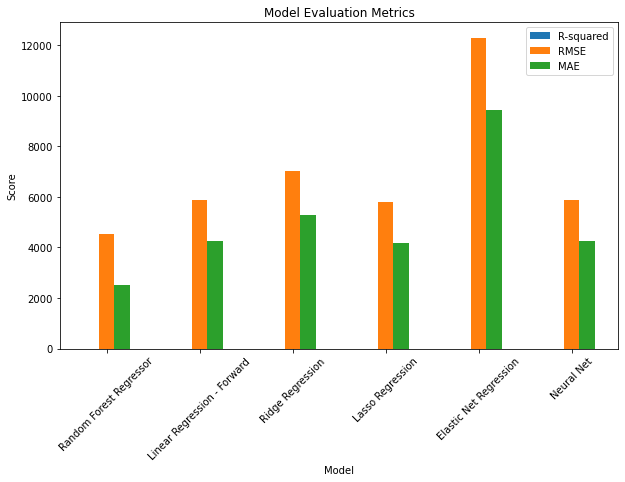

In [68]:
# Create the summary table
summary_table = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Linear Regression - Forward', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression', 'Neural Net'],
    #'R-squared': [rf_r2, lr_r2, ridge_r2, lasso_r2, elastic_r2, r2_nn],
    'RMSE': [rf_rmse, lr_rmse, ridge_rmse, lasso_rmse, elastic_rmse, rmse_nn],
    'MAE': [mae_rf, mae_lr, ridge_mae, lasso_mae, elastic_mae, mae_nn]
})

# Set the 'Model' column as the index
summary_table.set_index('Model', inplace=True)

# Create bar plots for R-squared, RMSE, and MAE
summary_table.plot(kind='bar', figsize=(10, 6))

# Set the plot labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')

# Adjust the legend location
plt.legend(loc='upper right')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

C:\Users\jisoo\AppData\Local\Temp\ipykernel_5656\3679491201.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(summary_table['Model'], rotation=45, ha='right')
C:\Users\jisoo\AppData\Local\Temp\ipykernel_5656\3679491201.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


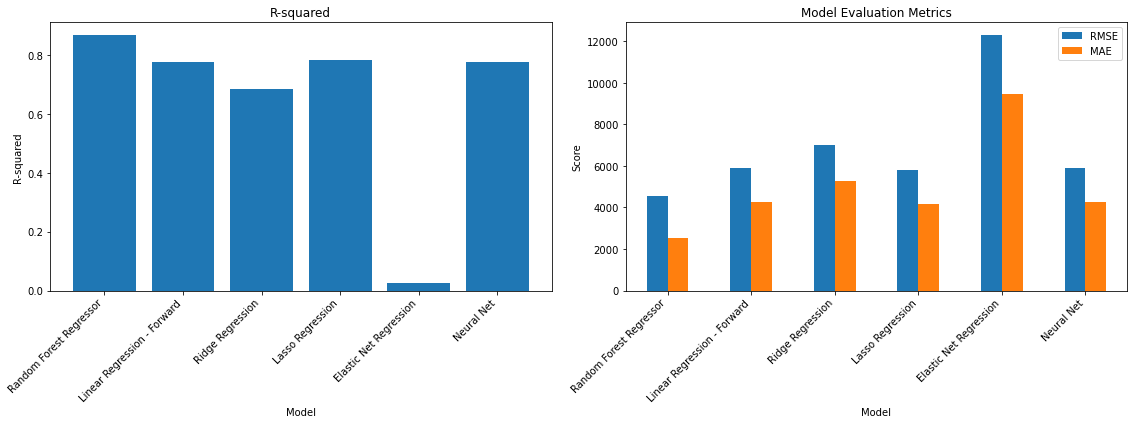

In [76]:
# Create the summary table
summary_table = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Linear Regression - Forward', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression', 'Neural Net'],
    'R-squared': [rf_r2, lr_r2, ridge_r2, lasso_r2, elastic_r2, r2_nn],
    'RMSE': [rf_rmse, lr_rmse, ridge_rmse, lasso_rmse, elastic_rmse, rmse_nn],
    'MAE': [mae_rf, mae_lr, ridge_mae, lasso_mae, elastic_mae, mae_nn]
})

# Create subplots for R-squared and model evaluation metrics
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot R-squared
axes[0].bar(summary_table['Model'], summary_table['R-squared'])
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R-squared')
axes[0].set_title('R-squared')
axes[0].set_xticklabels(summary_table['Model'], rotation=45, ha='right')

# Plot RMSE and MAE
summary_table.plot(x='Model', y=['RMSE', 'MAE'], kind='bar', ax=axes[1])
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Score')
axes[1].set_title('Model Evaluation Metrics')
axes[1].legend()

# Rotate the x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()